In [1]:
import numpy as np
import matplotlib.pyplot as plt
import imageio
import eksplisitt  as eks
import ImageView as imv

In [31]:
def constrast(file, k):
    orig_im = imageio.imread(file)
    orig_grey_im = np.copy(orig_im)
    
    orig_im = orig_im.astype(float) / 255
    im = np.copy(orig_im)
    
    orig_grey_im = np.sum(orig_im.astype(float),2)/(3*255)
    grey_im = np.copy(orig_grey_im)
        
    for i in range(10):
        laplace = (im[0:-2, 1:-1] +
            im[2:, 1:-1] +
            im[1:-1, 0:-2] +
            im[1:-1, 2:] -
            4 * im[1:-1, 1:-1])
        h = k * (orig_im[0:-2, 1:-1] +
            orig_im[2:, 1:-1] +
            orig_im[1:-1, 0:-2] +
            orig_im[1:-1, 2:] -
            4 * orig_im[1:-1, 1:-1])
        im[1:-1, 1:-1] += .25 * (laplace - h)
        im[:, 0] = im[:, 1]      # Neumann randbetingelse
        im[:, -1] = im[:, -2]    #
        im[0, :] = im[1, :]      #
        im[-1, :] = im[-2 , :]   #
        im[im < 0] = 0                                 # klipp til lovlige verdier
        im[im > 1] = 1
        
    for i in range(10):
        laplace = (grey_im[0:-2, 1:-1] +
            grey_im[2:, 1:-1] +
            grey_im[1:-1, 0:-2] +
            grey_im[1:-1, 2:] -
            4 * grey_im[1:-1, 1:-1])
        h = k * (orig_grey_im[0:-2, 1:-1] +
            orig_grey_im[2:, 1:-1] +
            orig_grey_im[1:-1, 0:-2] +
            orig_grey_im[1:-1, 2:] -
            4 * orig_grey_im[1:-1, 1:-1])
        grey_im[1:-1, 1:-1] += .25 * (laplace - h)
        grey_im[:, 0] = grey_im[:, 1]      # Neumann randbetingelse
        grey_im[:, -1] = grey_im[:, -2]    #
        grey_im[0, :] = grey_im[1, :]      #
        grey_im[-1, :] = grey_im[-2 , :]   #
        grey_im[grey_im < 0] = 0                                 # klipp til lovlige verdier
        grey_im[grey_im > 1] = 1
    
    imv.viewBW(orig_im, im, orig_grey_im, grey_im, "Kontrastforsterket") #Displayer bildene ved siden av hverandre

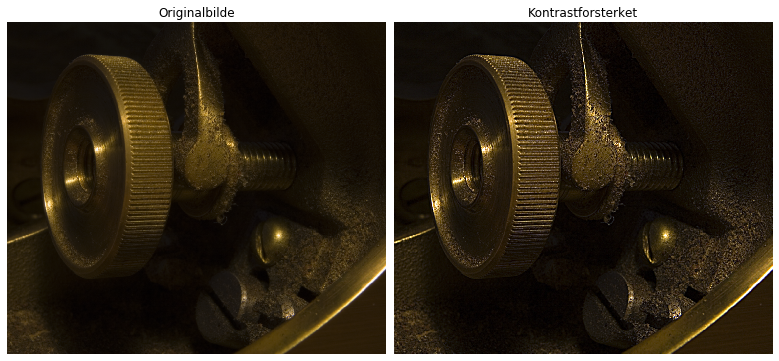

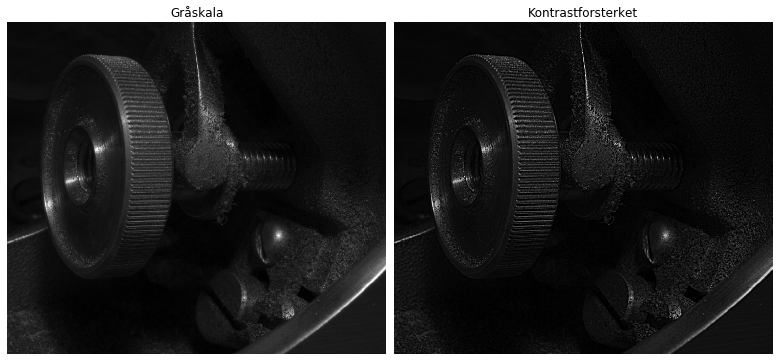

In [34]:
filepath = "..\hdr-bilder\Adjuster\Adjuster_00002.png"
constant = 2.4

constrast(filepath, constant)